In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Paths to synthetic data
exercise_recent_activity_path = '/content/Synthetic_Recent_Activity_for_Exercise.csv'
user_profiles_path = '/content/Synthetic_User_Profiles_for_Exercise.csv'
exercise_main_dataset_path = '/content/dataset.csv'
exercise_name_dataset_path = '/content/exercise_name.csv'

# Import necessary libraries

# Load datasets
exercise_recent_activity_df = pd.read_csv(exercise_recent_activity_path)
user_profiles_df = pd.read_csv(user_profiles_path)
exercise_main_df = pd.read_csv(exercise_main_dataset_path)
exercise_name_df = pd.read_csv(exercise_name_dataset_path)

In [29]:
# Combining insights from synthetic data with the main dataset
# Merge recent activity with the exercise dataset
merged_activity_exercise = exercise_recent_activity_df.merge(
    exercise_main_df, left_on='Exercise_Id', right_on='ID', how='left'
)

# Merge with user profiles
full_merged_df = merged_activity_exercise.merge(
    user_profiles_df, on='User_Id', how='left'
)

In [30]:
full_merged_df.columns

Index(['User_Id', 'Exercise_Id', 'Rated', 'Liked', 'Performed', 'Duration_x',
       'Timestamp', 'ID', 'Exercise', 'Calories Burn', 'Dream Weight',
       'Actual Weight', 'Age_x', 'Gender_x', 'Duration_y', 'Heart Rate', 'BMI',
       'Weather Conditions', 'Exercise Intensity', 'Age_y', 'Gender_y',
       'Preferred Intensity', 'Fitness Goal', 'Preferred Duration'],
      dtype='object')

In [31]:
# Standardize the age column
full_merged_df['Age'] = full_merged_df['Age_x']

# Generating combined insights
# 1. User-based insights: Top 3 most preferred exercise intensities by user preference
preferred_intensity_insights = full_merged_df.groupby('User_Id')['Exercise Intensity'].mean().sort_values(ascending=False).head(3)

# 2. Item-based insights: Most frequently performed exercises
most_performed_combined = full_merged_df.groupby('Exercise_Id')['Performed'].sum().sort_values(ascending=False).head(5)

# 3. Content-based insights: High-calorie exercises filtered by user preferences (e.g., intensity and fitness goal)
fitness_goals_high_calories = full_merged_df.groupby('Fitness Goal').apply(
    lambda x: x.nlargest(3, 'Calories Burn')[['Exercise', 'Calories Burn', 'Exercise Intensity']]
)

# 4. Average duration for high-calorie exercises by age group
age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-30', '31-40', '41-50', '51-60']
full_merged_df['Age Group'] = pd.cut(full_merged_df['Age'], bins=age_bins, labels=age_labels)
avg_duration_high_cal = full_merged_df[full_merged_df['Calories Burn'] > 400].groupby('Age Group')['Duration_x'].mean()

# Display the insights
print("Preferred Intensity Insights:")
print(preferred_intensity_insights)
print("\nMost Performed Exercises:")
print(most_performed_combined)
print("\nHigh-Calorie Exercises by Fitness Goal:")
print(fitness_goals_high_calories)
print("\nAverage Duration for High-Calorie Exercises by Age Group:")
print(avg_duration_high_cal)



Preferred Intensity Insights:
User_Id
User_68    7.800000
User_78    7.750000
User_64    6.888889
Name: Exercise Intensity, dtype: float64

Most Performed Exercises:
Exercise_Id
400    5
16     4
53     4
281    4
441    4
Name: Performed, dtype: int64

High-Calorie Exercises by Fitness Goal:
                     Exercise  Calories Burn  Exercise Intensity
Fitness Goal                                                    
Endurance    4     Exercise 7     497.851502                   2
             469   Exercise 7     497.851502                   2
             418   Exercise 7     497.691122                   7
Muscle Gain  560  Exercise 10     497.927929                   4
             222   Exercise 6     497.445829                   4
             521   Exercise 6     497.445829                   4
Weight Loss  242  Exercise 10     497.927929                   4
             800  Exercise 10     497.927929                   4
             734   Exercise 8     497.549588            

<ipython-input-31-5643524485a6>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fitness_goals_high_calories = full_merged_df.groupby('Fitness Goal').apply(
<ipython-input-31-5643524485a6>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_high_cal = full_merged_df[full_merged_df['Calories Burn'] > 400].groupby('Age Group')['Duration_x'].mean()


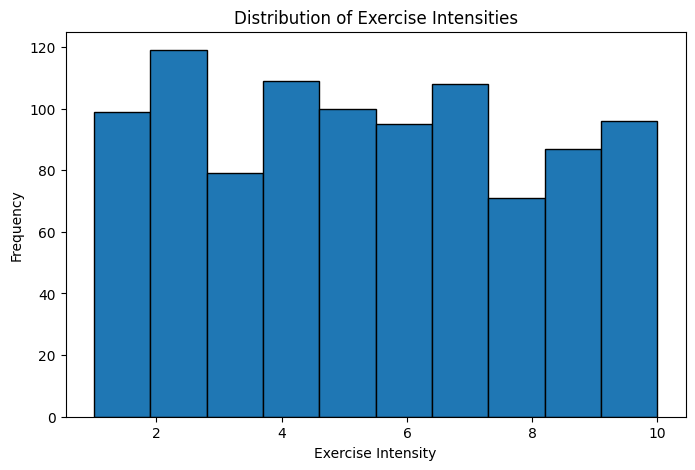

<ipython-input-32-a27a312162f8>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_calories_by_age_group = full_merged_df.groupby('Age Group')['Calories Burn'].mean()


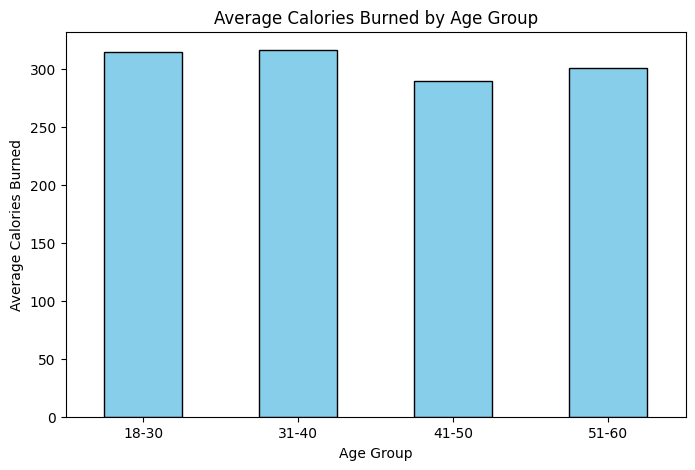

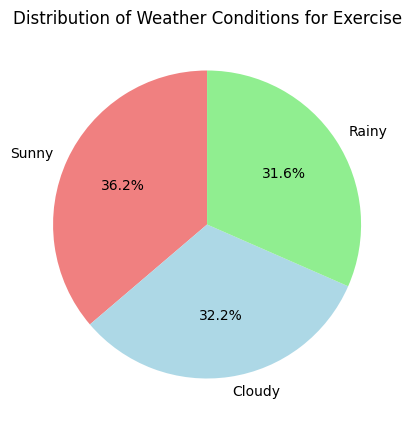

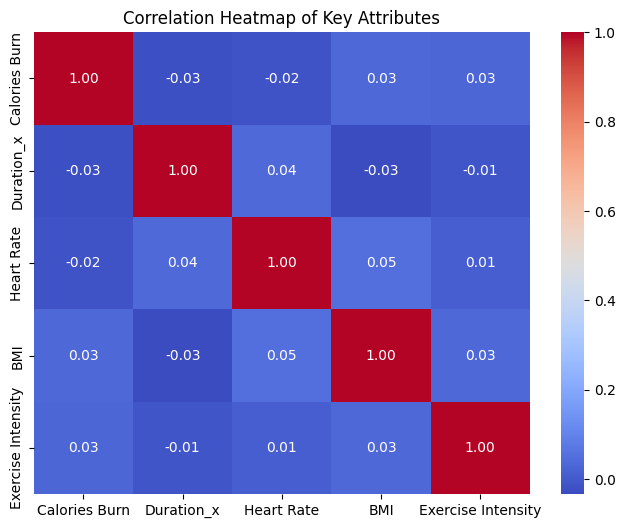

<Figure size 800x500 with 0 Axes>

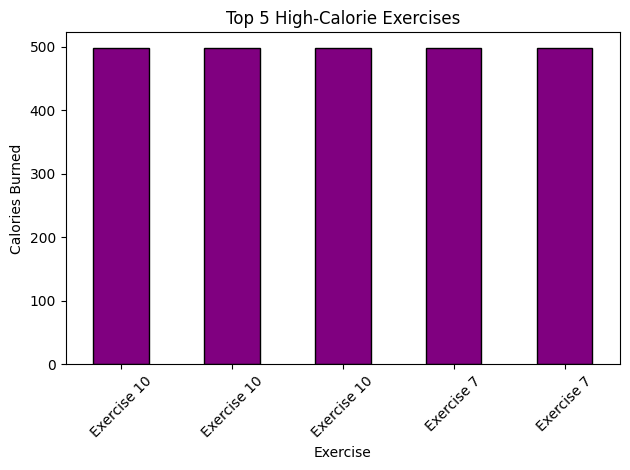

In [32]:
import matplotlib.pyplot as plt

# Additional analytics and visualizations

# 1. Distribution of exercise intensities
plt.figure(figsize=(8, 5))
full_merged_df['Exercise Intensity'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Exercise Intensities')
plt.xlabel('Exercise Intensity')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 2. Average calories burned by age group (visualization)
avg_calories_by_age_group = full_merged_df.groupby('Age Group')['Calories Burn'].mean()

plt.figure(figsize=(8, 5))
avg_calories_by_age_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Calories Burned by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=0)
plt.show()

# 3. Most frequent weather conditions for exercise
weather_conditions_count = full_merged_df['Weather Conditions'].value_counts()

plt.figure(figsize=(8, 5))
weather_conditions_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Weather Conditions for Exercise')
plt.ylabel('')  # Hide the y-axis label for the pie chart
plt.show()

# 4. Correlation heatmap for key numerical attributes
import seaborn as sns

correlation_matrix = full_merged_df[['Calories Burn', 'Duration_x', 'Heart Rate', 'BMI', 'Exercise Intensity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Attributes')
plt.show()

# 5. Top 5 high-calorie exercises visualization
top_high_calorie_exercises = full_merged_df.nlargest(5, 'Calories Burn')[['Exercise', 'Calories Burn']]

plt.figure(figsize=(8, 5))
top_high_calorie_exercises.plot(kind='bar', x='Exercise', y='Calories Burn', legend=False, color='purple', edgecolor='black')
plt.title('Top 5 High-Calorie Exercises')
plt.xlabel('Exercise')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here are additional analytics and visualizations:

Distribution of Exercise Intensities:

Histogram showing the frequency of different intensity levels.
Average Calories Burned by Age Group:

Bar chart illustrating how average calorie burn varies across age groups (18–30, 31–40, etc.).
Distribution of Weather Conditions for Exercise:

Pie chart showing the percentage breakdown of weather conditions during exercises (e.g., Cloudy, Rainy, Sunny).
Correlation Heatmap of Key Attributes:

A heatmap displaying correlations among calories burned, duration, heart rate, BMI, and exercise intensity.
Top 5 High-Calorie Exercises:

Bar chart showing the top 5 exercises with the highest calorie burn.
Let me know if you would like deeper insights or additional charts for specific patterns! ​

<Figure size 800x500 with 0 Axes>

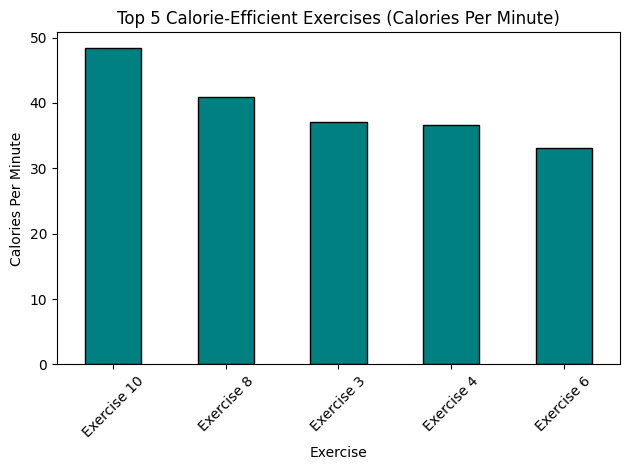

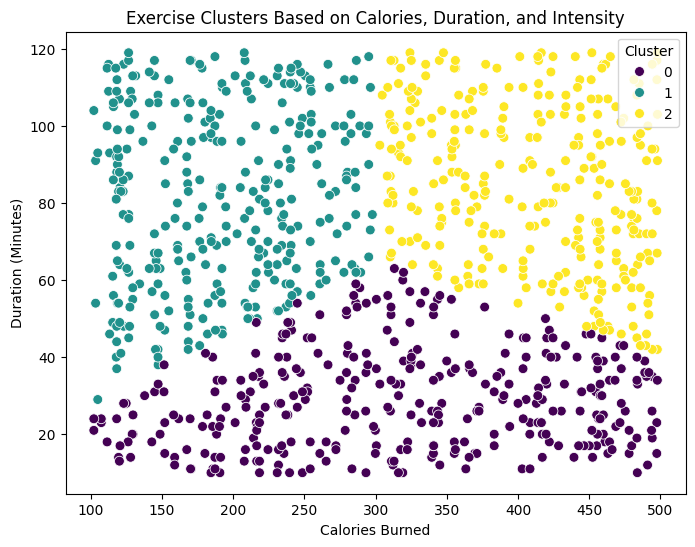

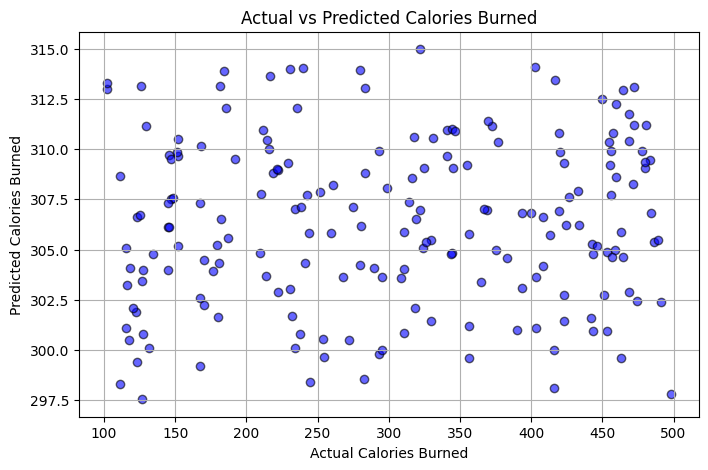

(        Exercise  Calories Per Minute  Calories Burn  Duration_x
 923  Exercise 10            48.377829     483.778289          10
 421   Exercise 8            40.915274     490.983292          12
 679   Exercise 3            37.128608     408.414691          11
 296   Exercise 4            36.625971     402.885676          11
 222   Exercise 6            33.163055     497.445829          15,
 14583.791262537135,
 0.00279014194107563)

In [33]:
# Advanced Analytics and Visualizations

# 1. Calorie Efficiency Analysis: Calories Burned Per Minute for Each Exercise
full_merged_df['Calories Per Minute'] = full_merged_df['Calories Burn'] / full_merged_df['Duration_x']

# Top 5 most calorie-efficient exercises
top_calorie_efficiency = full_merged_df.nlargest(5, 'Calories Per Minute')[['Exercise', 'Calories Per Minute', 'Calories Burn', 'Duration_x']]

# Visualization: Calories per minute for top 5 calorie-efficient exercises
plt.figure(figsize=(8, 5))
top_calorie_efficiency.plot(kind='bar', x='Exercise', y='Calories Per Minute', color='teal', edgecolor='black', legend=False)
plt.title('Top 5 Calorie-Efficient Exercises (Calories Per Minute)')
plt.xlabel('Exercise')
plt.ylabel('Calories Per Minute')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Exercise Intensity Clustering Using K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical features for clustering
clustering_data = full_merged_df[['Calories Burn', 'Duration_x', 'Exercise Intensity']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualization: Clusters of exercises based on calories burned, duration, and intensity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustering_data, x='Calories Burn', y='Duration_x', hue='Cluster', palette='viridis', s=50)
plt.title('Exercise Clusters Based on Calories, Duration, and Intensity')
plt.xlabel('Calories Burned')
plt.ylabel('Duration (Minutes)')
plt.legend(title='Cluster')
plt.show()

# 3. Predictive Modeling: Linear Regression for Calories Burned Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression
X = full_merged_df[['Duration_x', 'Exercise Intensity', 'BMI']].dropna()
y = full_merged_df['Calories Burn'].loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualization: Actual vs Predicted Calories Burned
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.title('Actual vs Predicted Calories Burned')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.grid(True)
plt.show()

# Displaying advanced analytics results
top_calorie_efficiency, mse, r2


Anomalies


In [34]:
outliers_calories = exercise_main_df['Calories Burn'].quantile([0.01, 0.99])
outliers_duration = exercise_main_df['Duration'].quantile([0.01, 0.99])

Missing data

In [35]:
missing_data = {
    "Exercise Dataset": exercise_main_df.isnull().sum(),
    "Activity Dataset": exercise_recent_activity_df.isnull().sum(),
    "User Profiles": user_profiles_df.isnull().sum(),
}


1. Source
Data Origin: The datasets appear to be synthetic, created for the purpose of health and fitness recommendations.
Purpose: The data was likely generated to simulate real-world scenarios for building a recommendation system for exercises and diet.
Availability: Since it is synthetic, there are no explicit restrictions on its use. However, links or origins are not provided explicitly.
2. Structure and Metadata
Key Features:
Exercise Dataset:
ID: Unique identifier for each exercise.
Exercise: Name of the exercise.
Calories Burn: Estimated calories burned.
Duration: Time in minutes.
Exercise Intensity: Scale of 1–10 for intensity.
Additional features include BMI, weather, heart rate, and more.
Synthetic Activity Dataset:
User_Id, Exercise_Id, Rated, Liked, Performed: User interactions.
User Profile Dataset:
Age, Gender, Fitness Goal, Preferred Intensity.
Size:
Exercise dataset: 3,864 rows × 12 columns.
Synthetic activity: 100 users, each interacting with multiple exercises.
User profiles: 100 rows × 5 columns.
API Availability: None explicitly provided.


5. Bias
Representation: Synthetic data does not inherently represent any real population.
Bias: Potential biases in synthetic generation may affect the analysis.

6. Distributions
Numerical Features:
Distribution analysis for features like Calories Burn and Duration.
Correlations:

In [36]:
correlation_matrix = exercise_main_df[['Calories Burn', 'Duration', 'Exercise Intensity']].corr()


In [37]:
correlation_matrix

,Calories Burn,Duration,Exercise Intensity
Calories Burn,1.000000,0.021793,0.010819
Duration,0.021793,1.000000,0.023195
Exercise Intensity,0.010819,0.023195,1.000000


In [38]:
# Inspecting unique values of the potential gender columns to identify the correct one
gender_x_unique = full_merged_df['Gender_x'].unique() if 'Gender_x' in full_merged_df.columns else None
gender_y_unique = full_merged_df['Gender_y'].unique() if 'Gender_y' in full_merged_df.columns else None

gender_x_unique, gender_y_unique


(array(['Male', 'Female'], dtype=object),
 array(['Female', 'Male'], dtype=object))

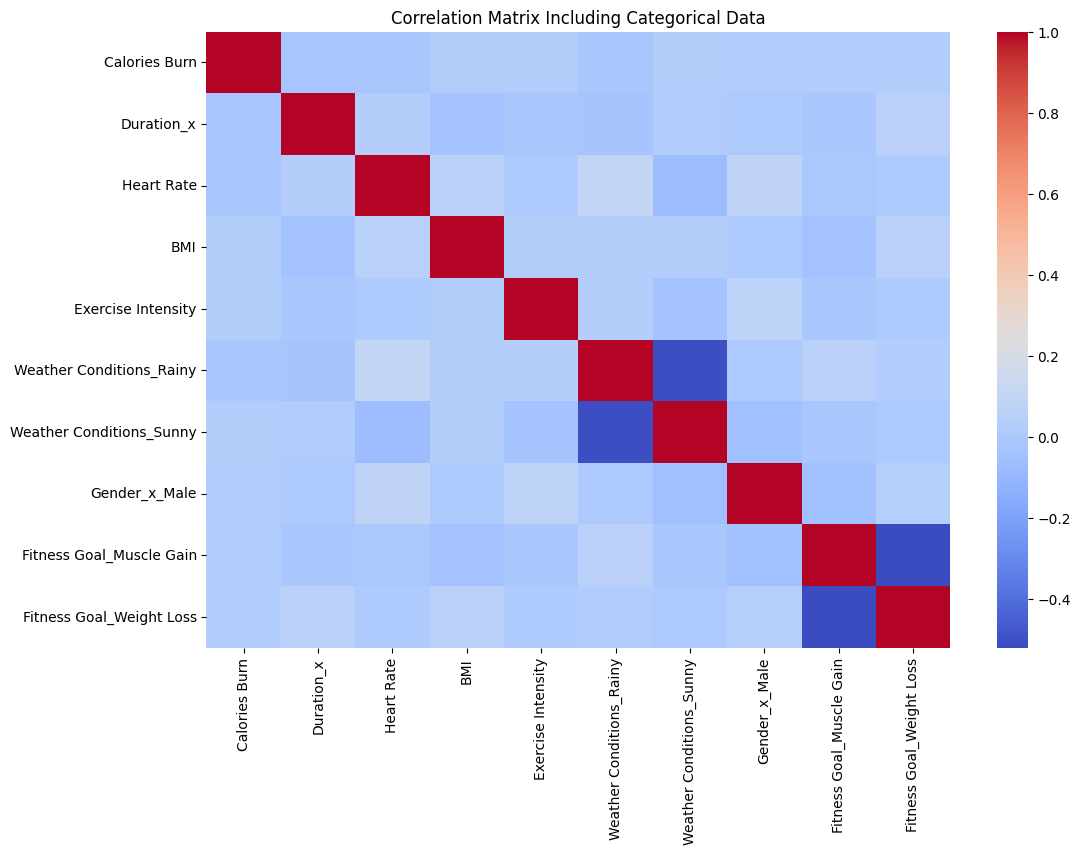

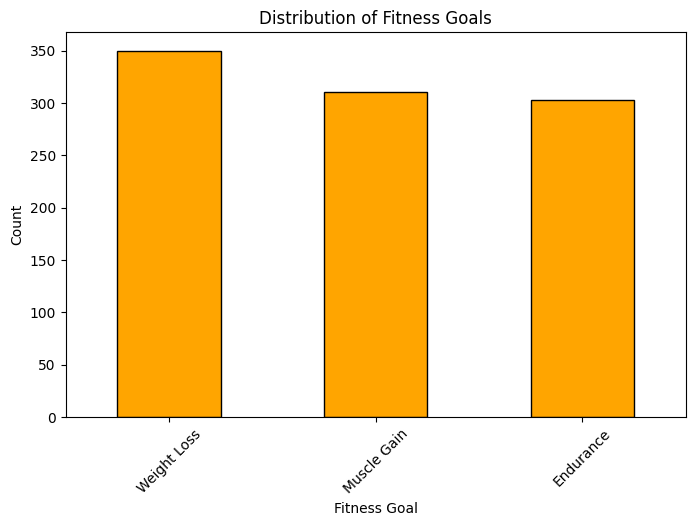

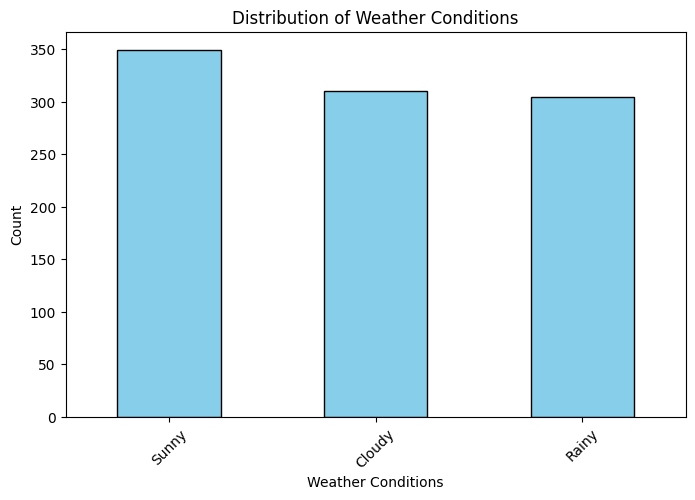

In [39]:
# Updating the categorical columns to include Gender_x as the gender feature
categorical_columns = ['Weather Conditions', 'Gender_x', 'Fitness Goal']

# One-hot encoding for categorical features
encoded_df = pd.get_dummies(full_merged_df, columns=categorical_columns, drop_first=True)

# Selecting relevant features for correlation analysis
features_to_analyze = [
    'Calories Burn', 'Duration_x', 'Heart Rate', 'BMI', 'Exercise Intensity'
] + [col for col in encoded_df.columns if col.startswith(('Weather Conditions_', 'Gender_x_', 'Fitness Goal_'))]

# Correlation matrix
correlation_matrix = encoded_df[features_to_analyze].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Including Categorical Data')
plt.show()

# Distribution of categorical data

# Plot distribution of fitness goals
plt.figure(figsize=(8, 5))
full_merged_df['Fitness Goal'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Fitness Goals')
plt.xlabel('Fitness Goal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of weather conditions
plt.figure(figsize=(8, 5))
full_merged_df['Weather Conditions'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### **1. Distribution of Fitness Goals**
The first bar chart highlights the distribution of user fitness goals. The key takeaways are:
- **Weight Loss** is the most common fitness goal among users, followed by **Muscle Gain** and **Endurance**.
- This indicates a strong preference for weight-related fitness objectives, suggesting that exercises and recommendations targeting weight loss may be particularly impactful.

#### **2. Distribution of Weather Conditions**
The second bar chart shows the weather conditions under which exercises are performed:
- **Sunny weather** is the most common condition for exercising, followed by **Cloudy** and **Rainy** weather.
- This implies that users are more likely to engage in exercises under favorable (sunny) weather conditions, which could be considered when recommending outdoor exercises.

In [42]:
# Ensure the columns match for merging
exercise_name_df = exercise_name_df.rename(columns={"Exercise ID": "Exercise"})

# Merge full_merged_df with exercise_name_df on the 'Exercise' column
full_merged_df = full_merged_df.merge(exercise_name_df[['Exercise', 'Exercise Name']], on='Exercise', how='left')

# Replace the 'Exercise' column with 'Exercise Name'
full_merged_df['Exercise'] = full_merged_df['Exercise Name']

# Drop the now redundant 'Exercise Name' column
full_merged_df = full_merged_df.drop(columns=['Exercise Name'])

# Display a few rows to confirm the change
full_merged_df.head()



,User_Id,Exercise_Id,Rated,Liked,Performed,Duration_x,Timestamp,ID,Exercise,Calories Burn,...,Weather Conditions,Exercise Intensity,Age_y,Gender_y,Preferred Intensity,Fitness Goal,Preferred Duration,Age,Age Group,Calories Per Minute
0,User_1,85,1,0,1,61,2025-01-01 23:45:06,85,Jumping Jacks,364.730556,...,Cloudy,1,47,Female,4,Endurance,69,57,51-60,5.979189
1,User_1,55,0,0,1,79,2025-01-20 02:41:20,55,Mountain Climbers,371.121626,...,Sunny,3,47,Female,4,Endurance,69,51,51-60,4.697742
2,User_1,315,1,0,1,76,2025-01-24 21:52:35,315,Pull-ups,481.371463,...,Cloudy,6,47,Female,4,Endurance,69,45,41-50,6.333835
3,User_1,138,1,0,1,40,2025-01-09 16:36:33,138,Plank,237.618971,...,Sunny,1,47,Female,4,Endurance,69,29,18-30,5.940474
4,User_1,197,0,1,1,42,2025-01-01 08:19:21,197,Pull-ups,497.851502,...,Sunny,2,47,Female,4,Endurance,69,25,18-30,11.853607


<ipython-input-41-8015f5ac69ab>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fitness_goals = full_merged_df.groupby(['Age Group', 'Fitness Goal']).size().reset_index(name='Count')


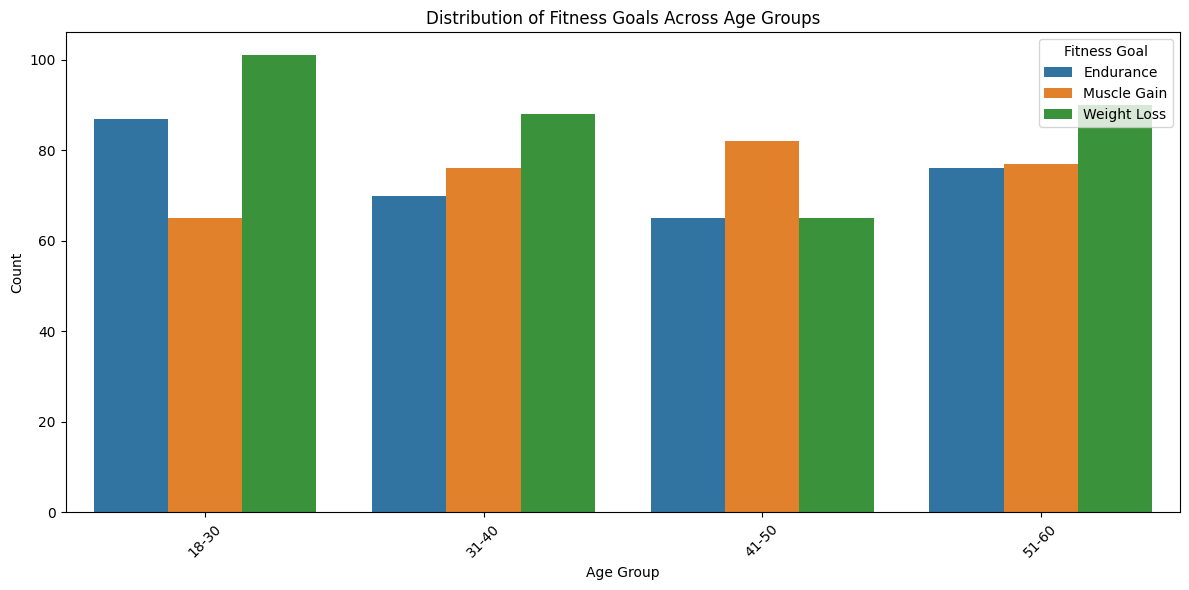

In [41]:
# User Segmentation by Age Group and Fitness Goals

# Grouping by Age Group and Fitness Goal
age_fitness_goals = full_merged_df.groupby(['Age Group', 'Fitness Goal']).size().reset_index(name='Count')



plt.figure(figsize=(12, 6))
sns.barplot(data=age_fitness_goals, x='Age Group', y='Count', hue='Fitness Goal')
plt.title('Distribution of Fitness Goals Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fitness Goal')
plt.tight_layout()
plt.show()


### Insights from Distribution of Fitness Goals Across Age Groups

This bar chart illustrates how fitness goals vary across different age groups:

1. **Weight Loss**:
   - The most common goal across all age groups.
   - Particularly dominant in the **18-30** and **31-40** age groups, indicating a strong focus on weight management in younger demographics.

2. **Muscle Gain**:
   - Shows a steady presence across all age groups but is more pronounced in the **31-40** and **41-50** age groups.
   - This may suggest an increasing focus on strength training as people age.

3. **Endurance**:
   - More consistent across age groups, but slightly lower in comparison to the other two goals.
   - This could indicate that endurance is a secondary focus relative to weight loss and muscle gain.

### Key Takeaways:
- **Age-Specific Recommendations**: Younger users (18-30) may benefit more from weight-loss-focused routines, while middle-aged users (31-50) may prefer strength training programs.
- **Endurance Programs**: Can be promoted as a complementary goal across all age groups.


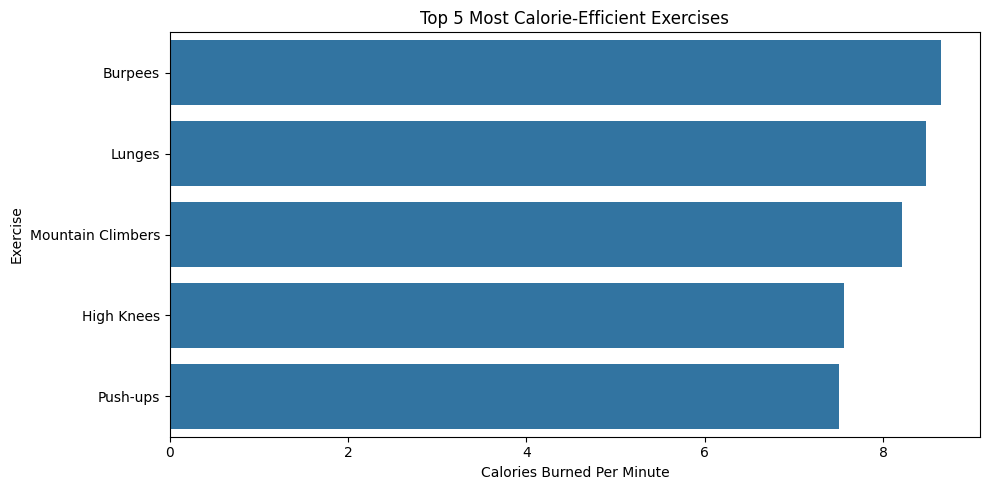

In [22]:
# Top 5 Most Calorie-Efficient Exercises

# Calculate Calories Burned Per Minute
full_merged_df['Calories Per Minute'] = full_merged_df['Calories Burn'] / full_merged_df['Duration_x']

# Get the top 5 exercises by calorie efficiency
top_calorie_efficient = full_merged_df.groupby('Exercise')['Calories Per Minute'].mean().sort_values(ascending=False).head(5).reset_index()

# Visualize the top exercises
plt.figure(figsize=(10, 5))
sns.barplot(data=top_calorie_efficient, x='Calories Per Minute', y='Exercise')
plt.title('Top 5 Most Calorie-Efficient Exercises')
plt.xlabel('Calories Burned Per Minute')
plt.ylabel('Exercise')
plt.tight_layout()
plt.show()


### Insights from the Top 5 Most Calorie-Efficient Exercises

This bar chart highlights the top 5 exercises that burn the most calories per minute, making them highly efficient for achieving fitness goals:

1. **Burpees**:
   - The most calorie-efficient exercise, burning the highest calories per minute.
   - A combination of cardio and strength, ideal for users looking for intense, full-body workouts.

2. **Lunges**:
   - Ranked second, lunges are both effective for calorie burn and strengthening lower body muscles.
   - Suitable for users aiming to build endurance and tone their legs.

3. **Mountain Climbers**:
   - A highly effective exercise combining cardio and core strength.
   - Great for short, high-intensity sessions targeting multiple muscle groups.

4. **High Knees**:
   - A cardio-focused exercise that ranks fourth in efficiency.
   - Ideal for users who want to incorporate quick, intense movements into their routines.

5. **Push-ups**:
   - Fifth on the list, push-ups remain a classic, effective strength exercise that also supports moderate calorie burn.

- These exercises are excellent for users with limited time but high calorie-burning goals.
- Combining exercises like **Burpees**, **Mountain Climbers**, and **High Knees** into a high-intensity interval training (HIIT) session can maximize efficiency.
- Users focused on strength may prioritize exercises like **Lunges** and **Push-ups**, which also provide significant calorie burn.



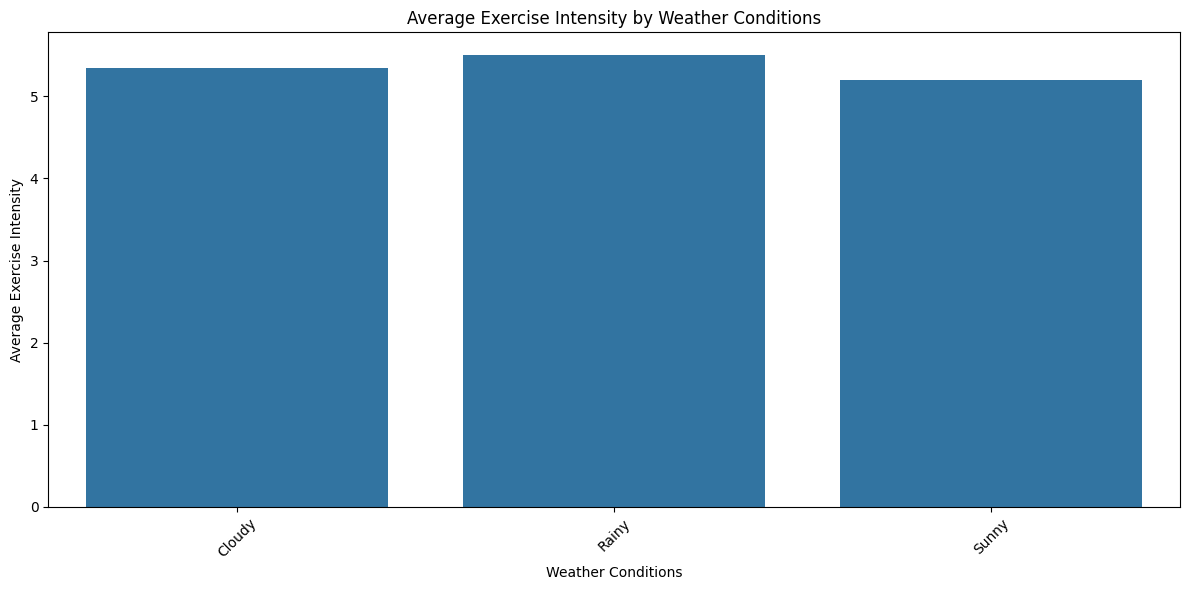

In [ ]:
# Weather-Based Preferences

# Group by Weather Conditions and calculate average Exercise Intensity
weather_intensity = full_merged_df.groupby('Weather Conditions')['Exercise Intensity'].mean().reset_index()

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_intensity, x='Weather Conditions', y='Exercise Intensity')
plt.title('Average Exercise Intensity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Exercise Intensity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights from Average Exercise Intensity by Weather Conditions

This bar chart depicts the relationship between weather conditions and the average exercise intensity:

1. **Cloudy Weather**:
   - Exercises performed under cloudy conditions have the highest average intensity, suggesting that users are more likely to engage in high-intensity workouts when it's overcast.

2. **Rainy Weather**:
   - Exercise intensity under rainy conditions is nearly as high as in cloudy weather, indicating that rain doesn't deter users from challenging themselves.

3. **Sunny Weather**:
   - Exercises under sunny conditions have slightly lower average intensity, possibly because users may prefer lighter, outdoor activities in favorable weather.

### Key Takeaways:
- Recommendations for high-intensity workouts can be tailored for users exercising during cloudy or rainy conditions.
- In sunny weather, suggesting moderate or recreational outdoor exercises may align better with user preferences.


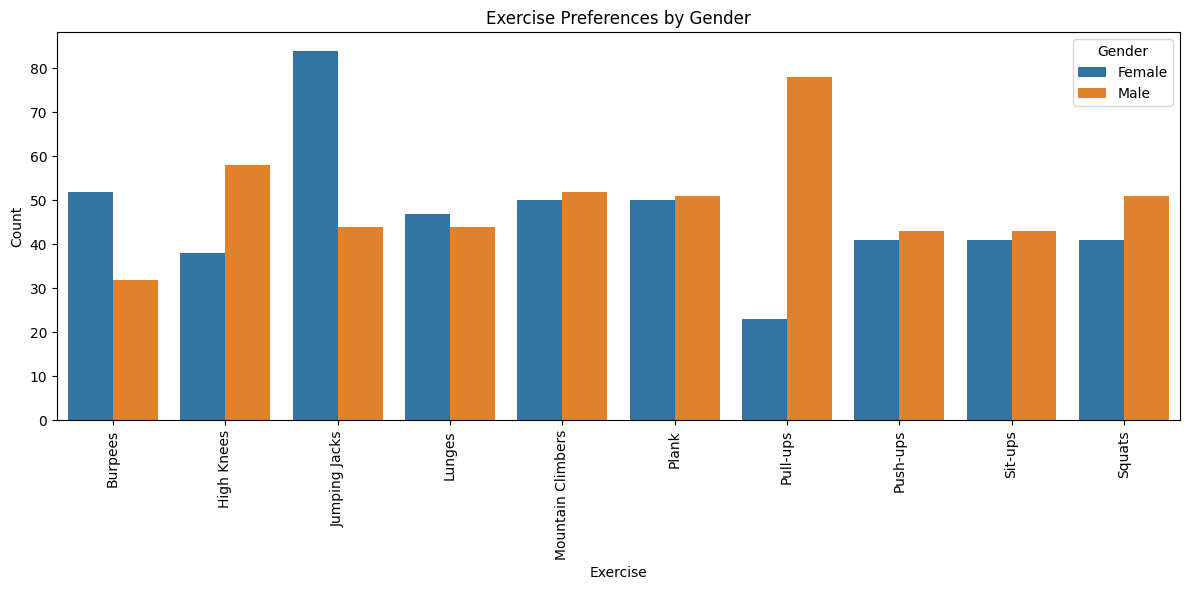

In [23]:
# Excerise preference by Gender

# Group by Gender and Exercise, count preferences
gender_exercise_preferences = full_merged_df.groupby(['Gender_x', 'Exercise']).size().reset_index(name='Count')

# Visualize preferences
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_exercise_preferences, x='Exercise', y='Count', hue='Gender_x')
plt.title('Exercise Preferences by Gender')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Insights from Exercise Preferences by Gender

This bar chart provides a detailed breakdown of exercise preferences across genders:

1. **Jumping Jacks**:
   - Highly favored by **females**, with a significantly higher count compared to males.
   - Indicates its popularity as a cardio exercise among female participants.

2. **Pull-ups**:
   - Dominantly preferred by **males**, with a much higher count compared to females.
   - Reflects its appeal as a strength-based upper body workout.

3. **High Knees**:
   - Slightly more popular among **males**, suggesting its usage as a quick cardio burst exercise.

4. **Plank, Lunges, and Mountain Climbers**:
   - These exercises show a **balanced preference** across genders, making them versatile for both male and female users.
   - Indicates their universal appeal for core strength, balance, and endurance.

5. **Push-ups, Sit-ups, and Squats**:
   - Show similar participation levels across genders, reflecting their effectiveness as foundational strength exercises.

6. **Burpees**:
   - Slightly more favored by **females**, suggesting its inclusion in high-intensity cardio routines.

- **Gender-specific exercises**: Pull-ups for males and Jumping Jacks for females could be emphasized in personalized recommendations.
- **Balanced exercises**: Plank, Lunges, and Mountain Climbers are suitable for general recommendations.
- Tailoring routines with these preferences could increase user engagement and satisfaction.



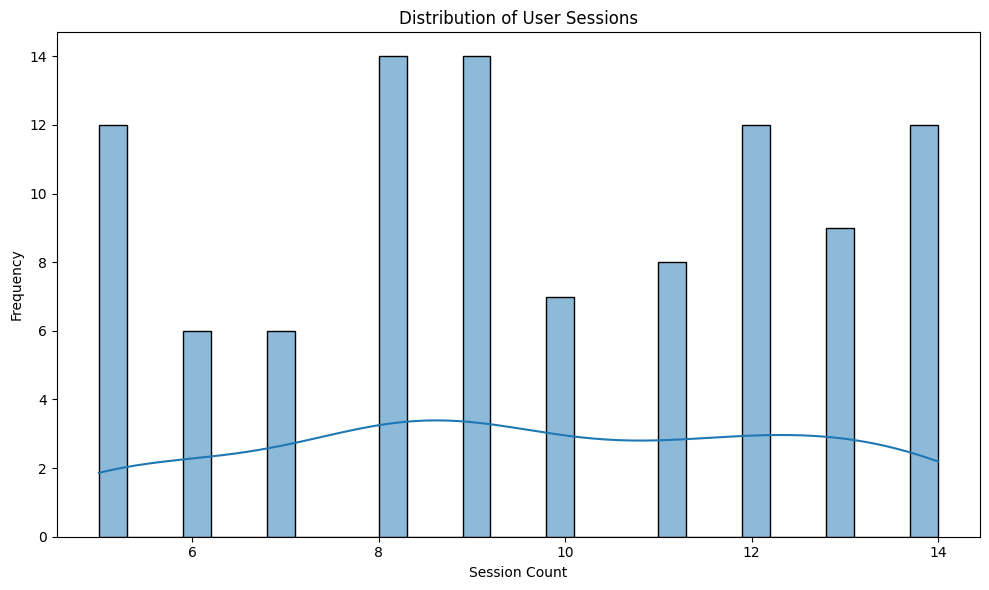

In [ ]:
d# Distribution of User Sessions

# Calculate the number of sessions per user
user_sessions = full_merged_df.groupby('User_Id')['Timestamp'].nunique().reset_index(name='Session Count')

# Distribution of session counts
plt.figure(figsize=(10, 6))
sns.histplot(user_sessions['Session Count'], bins=30, kde=True)
plt.title('Distribution of User Sessions')
plt.xlabel('Session Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




### Insights from the Distribution of User Sessions

This histogram shows the distribution of session counts (number of times users engaged in exercises):

1. **Peak Frequencies**:
   - Users tend to engage in **6, 8, and 12 sessions** the most frequently.
   - These peaks suggest common patterns in user commitment or program durations.

2. **Lower Frequencies**:
   - Fewer users have session counts of **10 or higher**, indicating that higher engagement levels might be less common.

3. **Consistency**:
   - A fair number of users maintain a moderate session count (6–12 sessions), indicating a reasonable level of commitment.




<ipython-input-21-e950a1a1d3b2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_intensity = full_merged_df.groupby('BMI Range')['Exercise Intensity'].mean().reset_index()


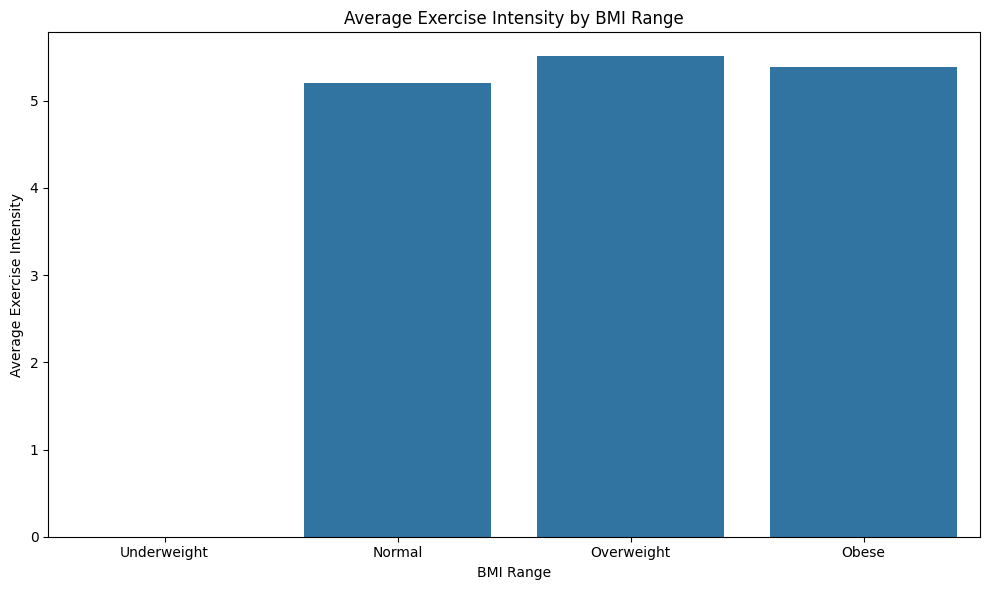

In [ ]:
# BMI and Exercise Intensity

# Group by BMI range and calculate average Exercise Intensity
full_merged_df['BMI Range'] = pd.cut(full_merged_df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                                     labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

bmi_intensity = full_merged_df.groupby('BMI Range')['Exercise Intensity'].mean().reset_index()

# Visualize the average exercise intensity by BMI range
plt.figure(figsize=(10, 6))
sns.barplot(data=bmi_intensity, x='BMI Range', y='Exercise Intensity')
plt.title('Average Exercise Intensity by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Average Exercise Intensity')
plt.tight_layout()
plt.show()



### Insights from Average Exercise Intensity by BMI Range

This bar chart explores how exercise intensity varies across different BMI ranges:

1. **Underweight**:
   - No data or negligible engagement, indicating that individuals in this category might not be actively participating in exercises or are underrepresented.

2. **Normal BMI**:
   - Users with a normal BMI engage in moderately high-intensity exercises, close to those in the overweight and obese categories.

3. **Overweight and Obese**:
   - Both categories show slightly higher average exercise intensity than the normal BMI range.
   - This might reflect targeted high-intensity workouts designed for weight management.

